In [0]:
import pandas as pd
import numpy as np
import time
import gc
import os
import sys
import dill
from matplotlib import pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
!pip install --upgrade --upgrade-strategy only-if-needed https://github.com/faizanahemad/data-science-utils/tarball/master > /dev/null

In [4]:
# When using in colab, upload lib.py, in the left side pane open files and then click upload
from data_science_utils.vision.keras import *

Using TensorFlow backend.


In [5]:

X_train, Y_train, X_test, Y_test = get_mnist_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


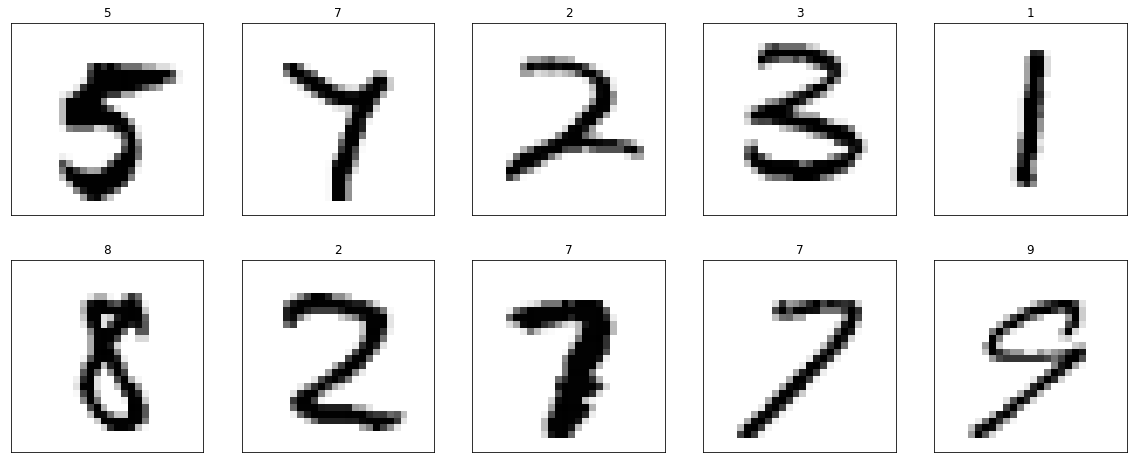

In [6]:
show_examples(X_train[10:20], Y_train[10:20],classes=get_mnist_labels())

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
import warnings
warnings.filterwarnings("ignore")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Params =  17402
Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 116us/step - loss: 1.9946 - acc: 0.3394 - val_loss: 1.2051 - val_acc: 0.6378
Epoch 2/5
54000/54000 [==============================] - 2s 42us/step - loss: 1.0258 - acc: 0.6614 - val_loss: 0.6955 - val_acc: 0.8172
Epoch 3/5
54000/54000 [==============================] - 2s 42us/step - loss: 0.6769 - acc: 0.7812 - val_loss: 0.4345 - val_acc: 0.8882
Epoch 4/5
54000/54000 [==============================] - 2s 42us/step - loss: 0.4640 - acc: 0.8537 - val_loss: 0.3136 - val_acc: 0.9140
Epoch 5/5
54000/54000 [==============================] - 2s 42us/step - loss: 0.3513 - acc: 0.8890 - val_loss: 0.2388 - val_acc: 0.9363
 =-=  =-=  =-=  =-=

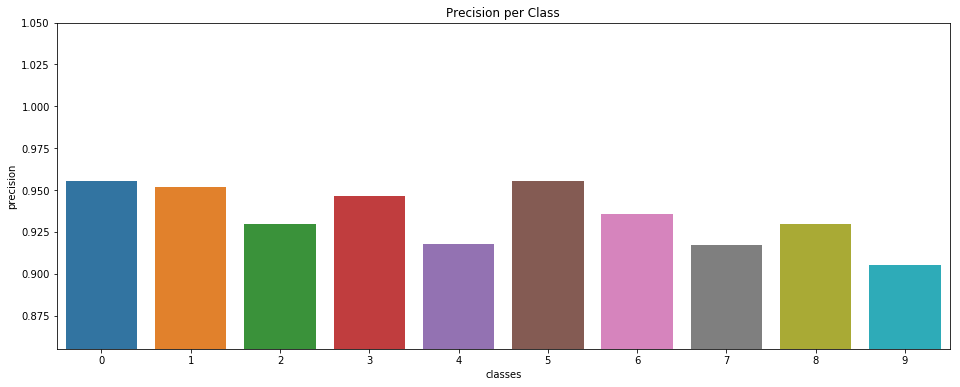

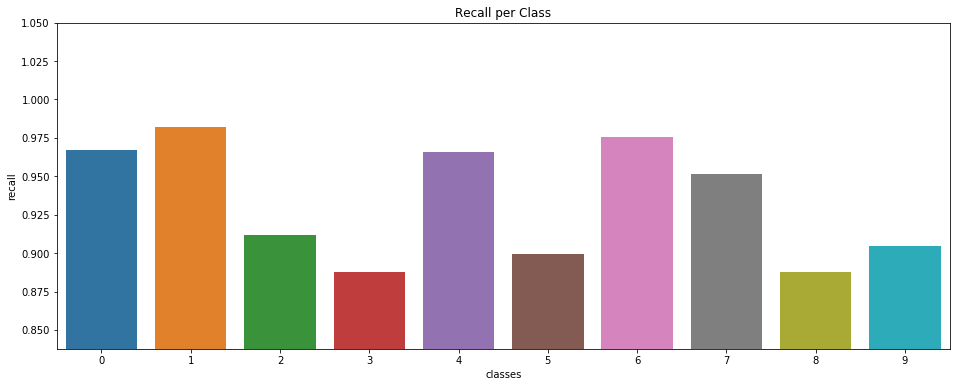

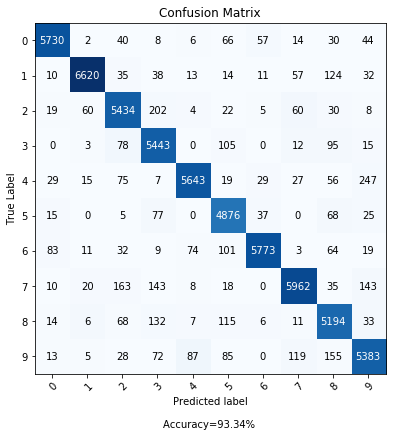

 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  17402
Score =  [0.21696319584846496, 0.9407]
Balanced Accuracy = 94.00% 



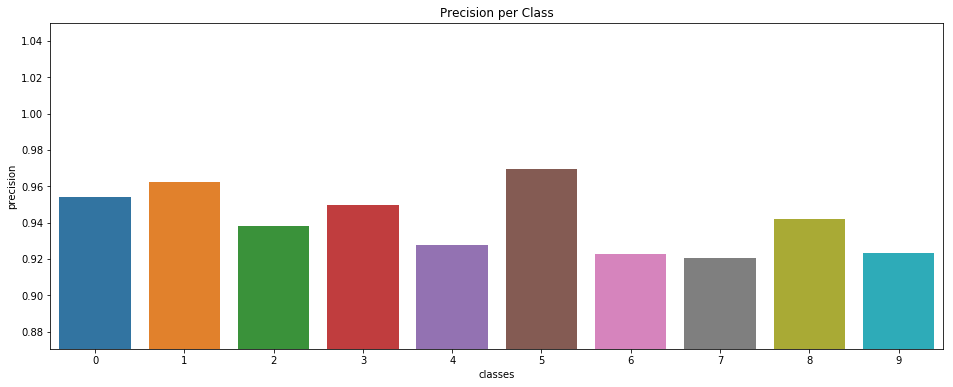

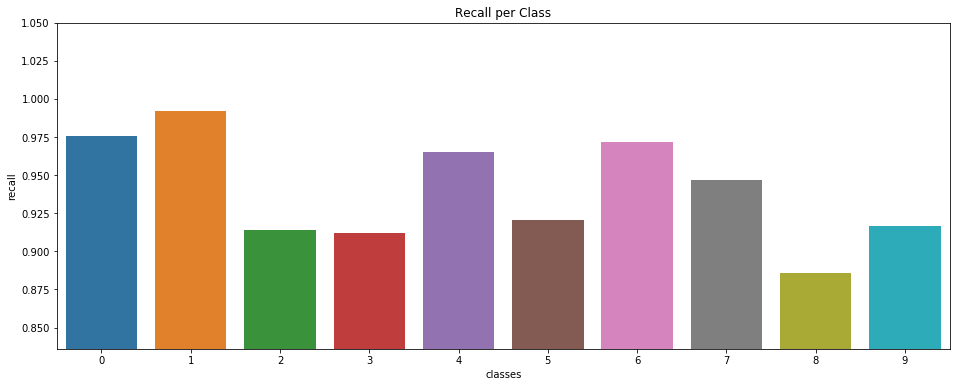

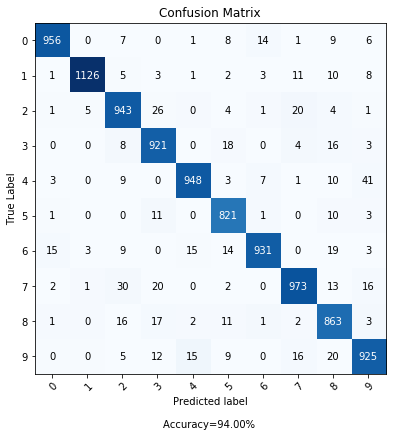

In [8]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(32, 3,3, activation='relu')) # 10
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(MaxPooling2D(pool_size=(2, 2))) #4



model.add(Convolution2D(32, 3,3, activation='relu')) # 2
model.add(keras.layers.Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1))


model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

_=model.fit(X_train, Y_train, batch_size=2048, epochs=5, verbose=1, shuffle=True, validation_split=0.1)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=True)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=True)


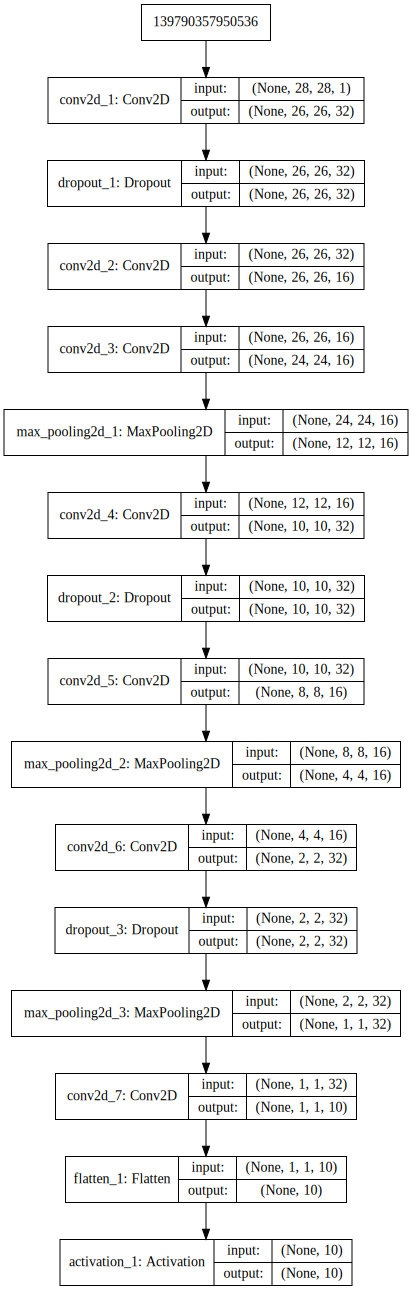

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True,).create(prog='dot', format='svg'))